In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import seaborn as sns
from datetime import datetime
import gc

data_raw = pd.read_csv("./Data1_raw.csv")
data_demo = data_raw.copy()

# Preprocessing Data1

Dataset link: https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset?rvi=1

## Part 1: Quick look

In [2]:
data_raw

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,2GNAXJEV0J6261526,39.7 in,NaN,NaN,NaN,SUV / Crossover,NaN,Fairfield,26.0,NaN,...,A,Automatic,t72936,1.5T LT FWD,NaN,FWD,Front-Wheel Drive,107.3 in,72.6 in,2018
3000036,1GNERFKW0LJ225508,38.4 in,NaN,NaN,NaN,SUV / Crossover,NaN,Vallejo,18.0,NaN,...,A,Automatic,t85763,LS FWD,NaN,FWD,Front-Wheel Drive,120.9 in,78.6 in,2020
3000037,3FA6P0HD3GR134062,38.3 in,NaN,NaN,NaN,Sedan,NaN,Napa,NaN,NaN,...,A,6-Speed Automatic Overdrive,t57569,SE,NaN,FWD,Front-Wheel Drive,112.2 in,83.5 in,2016
3000038,SAJAJ4BNXHA968809,35 in,NaN,NaN,NaN,Sedan,NaN,Fairfield,30.0,NaN,...,A,Automatic,t65977,20d Premium AWD,NaN,AWD,All-Wheel Drive,111.6 in,81.7 in,2017


In [3]:
data_raw.columns

Index(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type',
       'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date', 'listing_color', 'listing_id', 'longitude',
       'main_picture_url', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title',
       'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name',
       'vehicle_damage_category', 'whe

Lots of columns, many of which seem to have redundant information and/or lots of NULLs, let's take a closer look.

## Part 2: Dropping useless data

### No valid entries

Some columns only contain null values: `combine_fuel_economy`, `is_certified`, `vehicle_damage_category`

In [4]:
data_raw[["combine_fuel_economy", "is_certified", "vehicle_damage_category"]].isnull().all()

combine_fuel_economy       True
is_certified               True
vehicle_damage_category    True
dtype: bool

Drop them!

In [5]:
data_demo = data_demo.drop(columns=["combine_fuel_economy", "is_certified", "vehicle_damage_category"])

### Redundant info

`engine_cylinders` has the exact same entries as `engine_type`:

In [6]:
(data_raw.engine_cylinders.dropna() == data_raw.engine_type.dropna()).all()

True

Drop `engine_cylinders`.

In [7]:
data_demo = data_demo.drop(columns=["engine_cylinders"])

`exterior_color` is just `listing_color` with more vehicle-specific detail that will bog down modelling:

In [8]:
data_raw.exterior_color.value_counts()

Black                                  162463
White                                  126560
Summit White                            96432
Silver                                  78908
Gray                                    77562
                                        ...  
Blue Dusk Clearcoat Metallic                1
Dark Performancesian Green Metallic         1
BRILLANT                                    1
WHITE MET                                   1
Cosmic                                      1
Name: exterior_color, Length: 28665, dtype: int64

Here we'll just drop `exterior_color`.

In [9]:
data_demo = data_demo.drop(columns=["exterior_color"])

Likewise, `transmission_display` is just `transmission` with more vehicle-specific detail that will bog down modelling -> here we'll just drop `transmission_display`.

In [10]:
data_demo = data_demo.drop(columns=["transmission_display"])

`is_cpo` (dealer certified pre-owned) heavily overlaps with `is_oemcpo` (manufacturer certified pre-owned) -> drop `is_cpo`.

In [11]:
data_demo = data_demo.drop(columns=["is_cpo"])

`wheel_system_display` is just a renaming of `wheel_system` -> drop `wheel_system_display`.

In [12]:
data_demo = data_demo.drop(columns=["wheel_system_display"])

### Overly specific/otherwise useless info

The following columns contain either overly specific info (too many categoies) or info that has little to no bearing on the vehicle price:

`back_legroom`, `bed`, `bed_height`, `bed_length`, `cabin`, `description`, `fleet`, `frame_damaged`, `franchise_make`, `front_legroom`, `interior_color`, `isCab`, `is_new`, `main_picture_url`, `major_options`, `owner_count`, `salvage`, `savings_amount`, `theft_title`

We'll drop all of them.

In [13]:
data_demo = data_demo.drop(columns=["back_legroom", "bed", "bed_height", "bed_length",
                                    "cabin", "description", "fleet", "frame_damaged", "franchise_make",
                                    "front_legroom", "interior_color", "isCab", "is_new",
                                    "main_picture_url", "major_options", "owner_count",
                                    "salvage", "savings_amount", "theft_title"])

## Part 3: Dealing with missing values

Even after dropping the most egregious columns when it comes to NULL values, there are still a lot of NULLs in the remaining columns that can mean different things in different contexts. Let's go through them:

In [14]:
data_demo.isnull().sum()

vin                           0
body_type                 13543
city                          0
city_fuel_economy        491285
daysonmarket                  0
dealer_zip                    0
engine_displacement      172386
engine_type              100581
franchise_dealer              0
fuel_tank_volume         159269
fuel_type                 82724
has_accidents           1426595
height                   159269
highway_fuel_economy     491285
horsepower               172386
is_oemcpo               2864678
latitude                      0
length                   159269
listed_date                   0
listing_color                 0
listing_id                    0
longitude                     0
make_name                     0
maximum_seating          159269
mileage                  144387
model_name                    0
power                    481426
price                         0
seller_rating             40872
sp_id                        96
sp_name                       0
torque  

In the case of `has_accidents`, NULL values are actually important and should not be blindly discarded, since not reporting accidents can indeed often mean that minor damage occured. Let's impute a third value "Unreported" for missings in this variable:

In [15]:
data_demo["has_accidents"] = data_demo.has_accidents.fillna("Unreported")

Furthermore, NULLs in `is_oemcpo` (manufacturer certified pre-owned) are also meaningful (actually `is_oemcpo` only has True or NULL entries). The data was scrapped from a number of websites on which a tag will appear if the vehicle was certified and not otherwise: a missing value here is likely to mean that the car was not certified, as opposed to implying a truly unknown value. We can safely fill missings here with "False":

In [16]:
data_demo["is_oemcpo"] = data_demo.is_oemcpo.fillna("False")

Finally, `power`, `torque`, `city_fuel_economy`, and `highway_fuel_economy` all have a large number of missing values while not being critical variables. Simply dropping them would be to lose a lot of data over what is probably less important information. Therefore, we will fill NULLs in `power` and `torque` with "Unknown" and NULLs in `city_fuel_economy` and `highway_fuel_economy` with "-1":

In [17]:
data_demo["power"] = data_demo.power.fillna("Unknown")
data_demo["torque"] = data_demo.torque.fillna("Unknown")
data_demo["city_fuel_economy"] = data_demo.city_fuel_economy.fillna(-1)
data_demo["highway_fuel_economy"] = data_demo.highway_fuel_economy.fillna(-1)

As a last note, this data also occassionally uses "--" to repesent NULL values:

In [18]:
(data_demo == "--").sum()

vin                        0
body_type                  0
city                       0
city_fuel_economy          0
daysonmarket               0
dealer_zip                 0
engine_displacement        0
engine_type                0
franchise_dealer           0
fuel_tank_volume        1408
fuel_type                  0
has_accidents              0
height                   468
highway_fuel_economy       0
horsepower                 0
is_oemcpo                  0
latitude                   0
length                   457
listed_date                0
listing_color              0
listing_id                 0
longitude                  0
make_name                  0
maximum_seating          501
mileage                    0
model_name                 0
power                      0
price                      0
seller_rating              0
sp_id                      0
sp_name                    0
torque                     0
transmission               0
trimId                     0
trim_name     

Let's replace these with null values so they can dropped in the next step:

In [19]:
data_demo = data_demo.replace("--", np.nan)

Now that every meaningful NULL value has been handled, we can drop the rows with unmeaningful, actually missing values:

In [20]:
data_demo = data_demo.dropna()

## Part 4: Basic cleaning and exploratory analysis

### Cleaning price

Let's begin with our target variable: price.

<Axes: xlabel='price', ylabel='Density'>

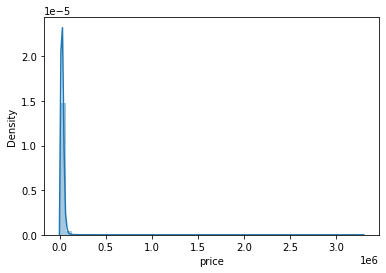

In [21]:
sns.distplot(data_demo.price)

There are some huge outliers! 3,000,000 is a lot to pay for a car... is this a mistake? Let's look at all cars above 1 million:

In [22]:
data_demo.loc[data_demo.price > 1000000, ["make_name", "model_name"]]

,make_name,model_name
28720,Ferrari,599 GTB Fiorano
174408,Ferrari,Enzo
179396,McLaren,P1
230048,Ford,Edge
582945,Lotus,Elise
908807,Bugatti,Veyron
1410578,Ferrari,Enzo
2056790,Porsche,918 Spyder
2114147,Chevrolet,Volt
2125636,Dodge,Grand Caravan


I'm not an expert on luxury cars... but these brands do seem kind of reasonable? In any case, whether the 3M is a mistake or not, taking our a few huge outliers is never a bad idea. For now, let's conservatively drop everything above 1M, which still leaves us a lot of very expensive cars!

In [23]:
data_demo = data_demo[data_demo.price < 1000000]

### Cleaning `mileage`

The car's odometer is usually one of most important factors in determining used car prices, let's take a look:

<Axes: xlabel='mileage', ylabel='Density'>

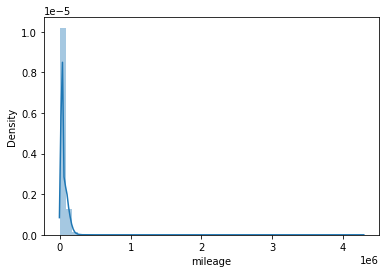

In [24]:
sns.distplot(data_demo.mileage)

4 million miles! What kind of car can go 4 million miles?! What kind of car can go 1 million miles?

In [25]:
data_demo.loc[data_demo.mileage > 1000000, ["price", "make_name", "model_name", "mileage"]]

,price,make_name,model_name,mileage
210044,50775.0,Chevrolet,Silverado 1500,4290461.0
1319359,45149.0,Ford,F-150,1225238.0
2072522,39523.0,Chevrolet,Silverado 1500,1111111.0
2072617,23620.0,Chevrolet,Equinox,1111111.0
2073566,41420.0,Chevrolet,Silverado 1500,1111111.0
2074186,41420.0,Chevrolet,Silverado 1500,1111111.0
2075306,45970.0,Cadillac,XT5,1111111.0


Yup, the Silverado is believable... still... 4 million miles? Crazy. Again, there are so few cars in this category I feel comfortable just dropping all of the 1M mile club members:

In [26]:
data_demo = data_demo[data_demo.mileage < 1000000]

### Cleaning `engine_type`

The column `engin_type` actually seems to include a lot of information about fuel type as well:

In [27]:
data_demo.engine_type.unique()

array(['I4', 'V6', 'V6 Diesel', 'I6', 'V8', 'H4', 'V8 Biodiesel',
       'V8 Flex Fuel Vehicle', 'V6 Flex Fuel Vehicle', 'I4 Hybrid',
       'V6 Hybrid', 'I3', 'I5', 'I4 Diesel', 'I4 Flex Fuel Vehicle',
       'I6 Diesel', 'R2', 'W12', 'V10', 'V12', 'V8 Diesel',
       'V6 Biodiesel', 'H6', 'I2', 'W12 Flex Fuel Vehicle',
       'I5 Biodiesel', 'V8 Hybrid', 'H4 Hybrid',
       'V8 Compressed Natural Gas', 'I6 Hybrid', 'W8',
       'I4 Compressed Natural Gas', 'I5 Diesel', 'V10 Diesel',
       'V8 Propane', 'I3 Hybrid', 'V6 Compressed Natural Gas', 'W16'],
      dtype=object)

On the other hand, we do have a dedicated column for `fuel_type`...

In [28]:
data_demo.fuel_type.value_counts()

Gasoline                  2317280
Flex Fuel Vehicle          132624
Hybrid                      66359
Diesel                      37054
Biodiesel                   20968
Compressed Natural Gas        133
Propane                         4
Name: fuel_type, dtype: int64

Now the question is: does the fuel type indicated in `engine_type` match the corresponding entries in `fuel_type`? Let's take out the actual engine string from `engine_type`:

In [29]:
data_demo.engine_type.str.split().str[1:].str.join(" ").value_counts()

                          2317280
Flex Fuel Vehicle          132624
Hybrid                      66359
Diesel                      37054
Biodiesel                   20968
Compressed Natural Gas        133
Propane                         4
Name: engine_type, dtype: int64

The numbers seem to match. Furthermore, it seems that if no fuel in particular was specified in `engine_type`, the actual type of fuel seems to be gasoline. Let's replace the blank entries with gasoline and see if the columns match:

In [30]:
(data_demo.engine_type.str.split().str[1:].str.join(" ").replace({"": "Gasoline"}) == data_demo.fuel_type).all()

True

Indeed every single value matches! This means we can safely take only the engine type string for `engine_type` and discard the rest of that variable, since the info is already in `fuel_type`.

In [31]:
data_demo["engine_type"] = data_demo.engine_type.str.split().str[0]

### Cleaning `fuel_tank_volume`

One would expect `fuel_tank_volume` to be just a number, except this dataset also included the units:

In [32]:
data_demo.fuel_tank_volume.value_counts()

26 gal      180132
13.2 gal    140356
18.5 gal    135805
14 gal      126698
14.5 gal     91693
             ...  
29.1 gal         2
63 gal           2
25.5 gal         2
40.7 gal         1
26.3 gal         1
Name: fuel_tank_volume, Length: 180, dtype: int64

Are all the entries in gallons?

In [33]:
(data_demo.fuel_tank_volume.str.split().str[1] == "gal").all()

True

Yup, that means we can just take first token and convert it to a float:

In [34]:
data_demo["fuel_tank_volume"] = data_demo.fuel_tank_volume.str.split().str[0].astype(float)

Let's take a look:

<Axes: xlabel='fuel_tank_volume', ylabel='Density'>

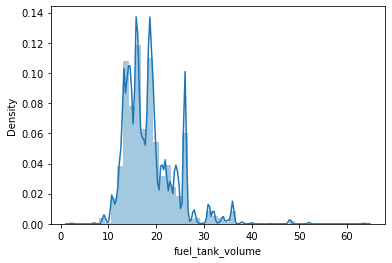

In [35]:
sns.distplot(data_demo.fuel_tank_volume)

Certainly a lot of large fuel tanks! And I thought 19 gallons was big...

### Cleaning `height`, `width`, and `length`

`height`, `width`, and `length` behave just like `fuel_tank_volume`, with useless units (inches in this case) making a numeric variable a categorical:

In [36]:
(data_demo.height.str.split().str[1] == "in").all()

True

In [37]:
(data_demo.width.str.split().str[1] == "in").all()

True

In [38]:
(data_demo.length.str.split().str[1] == "in").all()

True

Same treatment as `fuel_tank_volume`:

In [39]:
data_demo["height"] = data_demo.height.str.split().str[0].astype(float)
data_demo["width"] = data_demo.width.str.split().str[0].astype(float)
data_demo["length"] = data_demo.length.str.split().str[0].astype(float)

Just for fun, let's take a look at these dimensions too:

<Axes: xlabel='height', ylabel='Density'>

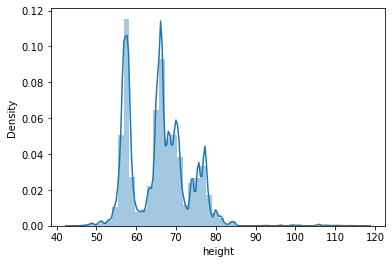

In [40]:
sns.distplot(data_demo.height)

<Axes: xlabel='width', ylabel='Density'>

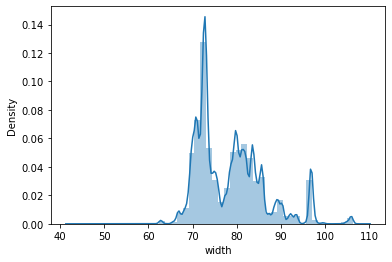

In [41]:
sns.distplot(data_demo.width)

<Axes: xlabel='length', ylabel='Density'>

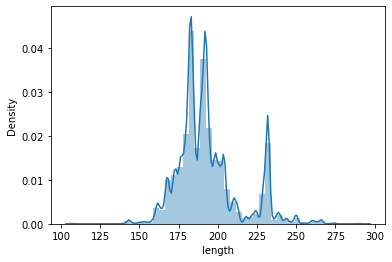

In [42]:
sns.distplot(data_demo.length)

This makes sense! Each mode in each plot essentially maps to one/a few vehicle categories, with smaller vehicles (like sedans, coupes, etc.) being usually the first mode and larger trucks populating the higher modes.

### Cleaning `maximum_seating`

Once again, we have another `fuel_tank_volume` situation with `maximum_seating`:

In [43]:
(data_demo.maximum_seating.str.split().str[1] == "seats").all()

True

Same treatment as before:

In [44]:
data_demo["maximum_seating"] = data_demo.maximum_seating.str.split().str[0].astype(float)

A brief look:

<Axes: xlabel='maximum_seating', ylabel='Density'>

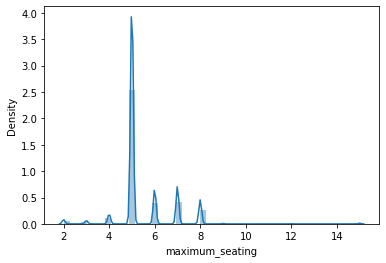

In [45]:
sns.distplot(data_demo.maximum_seating)

Yep, 5-seaters are most common.

### Cleaning `wheelbase`

Our final useless string-to-float conversion is `wheelbase`:

In [46]:
(data_demo.wheelbase.str.split().str[1] == "in").all()

True

In [47]:
data_demo["wheelbase"] = data_demo.wheelbase.str.split().str[0].astype(float)

A brief look:

<Axes: xlabel='wheelbase', ylabel='Density'>

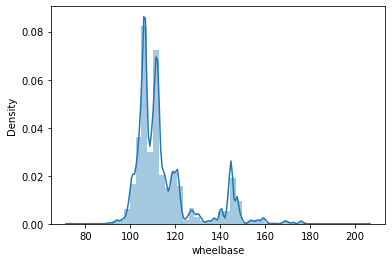

In [48]:
sns.distplot(data_demo.wheelbase)

Again, same mulitmodal stituation as the dimension measurements, expected!

### Cleaning `listed_date`

As with all date variables, we have to be a bit careful with `listed_date`.

In [49]:
data_demo.listed_date.head(5)

0    2019-04-06
1    2020-02-15
3    2020-02-26
4    2020-04-25
5    2020-01-11
Name: listed_date, dtype: object

It seems to be in yyyy-mm-dd format, let's split it out into three columns:

In [50]:
data_demo["listing_year"] = data_demo.listed_date.str[0:4].astype(int)
data_demo["listing_month"] = data_demo.listed_date.str[5:7].astype(int)
data_demo["listing_day"] = data_demo.listed_date.str[8:10].astype(int)
data_demo = data_demo.drop(columns=["listed_date"])

As always, let's take a look:

<Axes: xlabel='listing_day', ylabel='Density'>

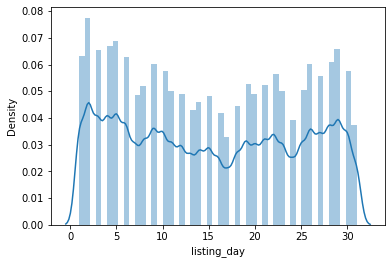

In [51]:
sns.distplot(data_demo.listing_day)

As expected, no significant difference in listing amounts throughout the month. The gaps in the plot are just due to seaborn's automatic binning which I'm too lazy to change -> there are indeed values for every single day.

<Axes: xlabel='listing_month', ylabel='Density'>

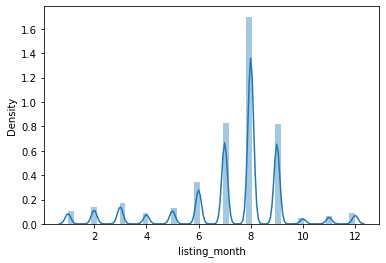

In [52]:
sns.distplot(data_demo.listing_month)

Summer is used car selling season!

<Axes: xlabel='listing_year', ylabel='Density'>

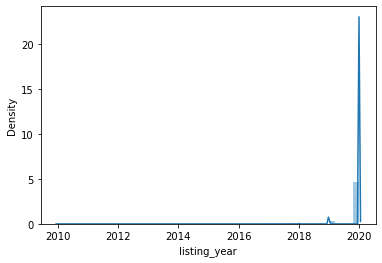

In [53]:
sns.distplot(data_demo.listing_year)

Haha it seems like there's a car that was listed in 2010 and either no one every bought it or it was never taken off the listing site, is this a mistake?

In [54]:
data_demo[data_demo.listing_year == 2010].daysonmarket

719796    3573
Name: daysonmarket, dtype: int64

No mistake... 3500+ days is indeed around 10 years from 2020, when this data was scraped.

### Cleaning `dealer_zip`

`dealer_zip` is a zipcode and should be an int, however:

In [55]:
data_demo.dealer_zip.dtype

dtype('O')

This is because there are zipcodes like "96740-1631". For these zipcodes, we'll just keep the first part (we have the longitude and latitude anyways):

In [56]:
data_demo["dealer_zip"] = data_demo.dealer_zip.astype(str).str.split("-").str[0].astype(int)

### Padding, `sp_id`, `listing_id`, and `trimId`

`sp_id` refers to the ID of a dealership while `listing_id` refers to the ID of a particular listing for a vehicle. Both currently as numeric types:

In [57]:
data_demo.sp_id

0          370599.0
1          389227.0
3          389227.0
4          389227.0
5          389227.0
             ...   
3000034     55297.0
3000035    341247.0
3000036    310674.0
3000038    341247.0
3000039     64910.0
Name: sp_id, Length: 2574422, dtype: float64

In [58]:
data_demo.listing_id

0          237132766
1          265946296
3          266911050
4          270957414
5          262940541
             ...    
3000034    274134037
3000035    280498781
3000036    269431681
3000038    280923167
3000039    280345818
Name: listing_id, Length: 2574422, dtype: int64

However, the other 2 ID variables, `vin` and `trimID`, come as strings with distinct identifying characteristics. For consistency's sake and ease of identification, let's pad out `sp_id` and `listing_id` and prefix them with "D" for dealer and "L" for listing, respectively:

In [59]:
# NOTE: data_demo.sp_id.astype(int).astype(str).str.len().max() == 6
# NOTE: data_demo.listing_id.astype(str).str.len().max() == 9
data_demo["sp_id"] = "D" + data_demo.sp_id.astype(int).astype(str).str.zfill(7) # pad one more zero in case more added later!
data_demo["listing_id"] = "L" + data_demo.listing_id.astype(str).str.zfill(10) # pad one more zero in case more added later!

While we're at it, let's pad out `trimId` and replace the lowercase "t" with the uppercase "MMYT" for Make-Model-Year-Trim (more on why later):

In [60]:
# NOTE: data_demo.trimId.str[1:].str.len().max() == 5
data_demo["trimId"] = "MMYT" + data_demo.trimId.str[1:].str.zfill(6) # pad one more zero in case more added later!

### Fixing `trim_name`

We would expect `trimId` to uniquely determine `trim_name`, except it doesn't...

In [61]:
data_demo[["trimId", "trim_name"]].groupby("trimId").nunique().query("trim_name > 1")

,trim_name
trimId,
MMYT001743,2
MMYT001841,2
MMYT001951,2
MMYT001970,2
MMYT002143,2
...,...
MMYT088991,2
MMYT089640,2
MMYT090309,2


That said, all of these differences are non-meaningful in the long run, take a few examples:

In [62]:
data_demo.loc[data_demo.trimId == "MMYT001743", ["make_name", "model_name", "trim_name"]].drop_duplicates()

,make_name,model_name,trim_name
26751,Chevrolet,Trailblazer,LS 4WD
649638,Chevrolet,Trailblazer,LT 4WD


Chevy's LS and LT has never been particularly crystal clear and oftentimes can denote the same trim if one looks across production years or special optioning. Another example:

In [63]:
data_demo.loc[data_demo.trimId == "MMYT089640", ["make_name", "model_name", "trim_name"]].drop_duplicates()

,make_name,model_name,trim_name
1781100,Honda,Civic,Si Coupe FWD with Summer Tires
2257149,Honda,Civic,Si Coupe FWD


For our purposes, we won't be too concerned about summer tires... One more example:

In [64]:
data_demo.loc[data_demo.trimId == "MMYT076529", ["make_name", "model_name", "trim_name"]].drop_duplicates()

,make_name,model_name,trim_name
21434,Nissan,Rogue,2017.5 SV FWD
839975,Nissan,Rogue,SV FWD


Again, no significant difference. For now, I will simply replace all the differing trim names with whichever one has the least character count, since the shortest character count is probably the one that is the most generic:

In [65]:
problem_trimIds = data_demo[["trimId", "trim_name"]].groupby("trimId").nunique().query("trim_name > 1").index
replacement_trim_names = data_demo.loc[data_demo.trimId.isin(problem_trimIds), ["trimId", "trim_name"]]
replacement_trim_names["str_length"] = replacement_trim_names.trim_name.str.len()
replacement_trim_names = replacement_trim_names.sort_values("str_length").drop_duplicates("trimId")[["trimId", "trim_name"]]
data_demo = data_demo.merge(right=replacement_trim_names, how="left", on="trimId", suffixes=("", "_replacement"))
data_demo.loc[data_demo.trimId.isin(problem_trimIds), "trim_name"] = data_demo.loc[data_demo.trimId.isin(problem_trimIds), "trim_name_replacement"]
data_demo = data_demo.drop(columns=["trim_name_replacement"])

Now `trimId` uniquely determines `trim_name`!

### A bit more cleaning to make `trimId` better

`trimId` is pretty powerful, except that there are a couple mistaken entires that mess up what it can and cannot uniquely determine. Take `trimId = MMYT047624` for example:

In [66]:
data_demo.loc[data_demo.trimId == "MMYT047624", ["trimId", "make_name", "model_name", "trim_name", "year", "body_type"]]

,trimId,make_name,model_name,trim_name,year,body_type
129215,MMYT047624,Toyota,Prius Plug-In,Base,2012,Sedan
149803,MMYT047624,Toyota,Prius Plug-In,Base,2012,Hatchback
172121,MMYT047624,Toyota,Prius Plug-In,Base,2012,Hatchback
196247,MMYT047624,Toyota,Prius Plug-In,Base,2012,Hatchback
239168,MMYT047624,Toyota,Prius Plug-In,Base,2012,Hatchback
1434532,MMYT047624,Toyota,Prius Plug-In,Base,2012,Hatchback
1694471,MMYT047624,Toyota,Prius Plug-In,Base,2012,Hatchback
2256008,MMYT047624,Toyota,Prius Plug-In,Base,2012,Hatchback
2423967,MMYT047624,Toyota,Prius Plug-In,Base,2012,Hatchback
2529964,MMYT047624,Toyota,Prius Plug-In,Base,2012,Hatchback


Although the distinction between sedans and hatchbacks is blurry, I'm pretty sure no Prius is ever marketed as a sedan (just looked it up and this statement is true for all Prius model years after 2003!)... that must have been a mistake on the dealer's side. In other words, `trimId` should be able to uniquely determine `body_type`, but some misentries prevent it from doing so. Other columns in which this happens are `maximum_seating` and `height`. For now, instead of doing add-hoc changes one-by-one, I will just remove the `trimId`s for which this happens (~20 total out of ~37k), since they probably represent on-the-edge cases that are easy to mess up (hatchbacks vs. sedans, for example):

In [67]:
more_problem_trimIds = set(data_demo[["trimId", "body_type"]].groupby("trimId").nunique().query("body_type > 1").index).union(
                       set(data_demo[["trimId", "maximum_seating"]].groupby("trimId").nunique().query("maximum_seating > 1").index).union(
                       set(data_demo[["trimId", "height"]].groupby("trimId").nunique().query("height > 1").index)))
data_demo = data_demo[~data_demo.trimId.isin(more_problem_trimIds)]

### A bit more cleaning to make `sp_id` better

Just like `trimId`, there are a few (<10) problematic dealerships that have the same ID but different values for `sp_name`, `city`, `dealer_zip`, `longitude`, `latitude`, and `franchise_dealer`. We'll remove them as their entries do not logically make sense:

In [68]:
problem_sp_ids = set(data_demo[["sp_id", "sp_name"]].groupby("sp_id").nunique().query("sp_name > 1").index).union(
                 set(data_demo[["sp_id", "city"]].groupby("sp_id").nunique().query("city > 1").index).union(
                 set(data_demo[["sp_id", "dealer_zip"]].groupby("sp_id").nunique().query("dealer_zip > 1").index).union(
                 set(data_demo[["sp_id", "longitude"]].groupby("sp_id").nunique().query("longitude > 1").index).union(
                 set(data_demo[["sp_id", "latitude"]].groupby("sp_id").nunique().query("latitude > 1").index).union(
                 set(data_demo[["sp_id", "franchise_dealer"]].groupby("sp_id").nunique().query("franchise_dealer > 1").index))))))
data_demo = data_demo[~data_demo.sp_id.isin(problem_sp_ids)]

### Dealer aggregate statistics

Let's get some aggregrate statistics for every `sp_id`! For now, let us do:
* `avg_rating`: average rating of the dealer over the entire dataset
* `total_listings`: total number of vehicles this dealer has listed

In [69]:
avg_rating_df = data_demo[["sp_id", "seller_rating"]].groupby("sp_id").mean().reset_index().rename({"seller_rating": "avg_rating"},axis=1)
data_demo = data_demo.merge(right=avg_rating_df, how="left", on="sp_id")
data_demo = data_demo.drop(columns=["seller_rating"])
total_listings_df = data_demo.groupby("sp_id").size().rename("total_listings").reset_index()
data_demo = data_demo.merge(right=total_listings_df, how="left", on="sp_id")

### Removing semicolons

We will be using semicolons as csv deliminators, so we need to make sure no strings contain it:

In [70]:
for column in data_demo.columns:
    if data_demo[column].dtype == "O":
        print(f"Column {column} has {data_demo[column].astype(str).str.contains(';').sum()} values with ';'.")

Column vin has 0 values with ';'.
Column body_type has 0 values with ';'.
Column city has 0 values with ';'.
Column engine_type has 0 values with ';'.
Column fuel_type has 0 values with ';'.
Column has_accidents has 0 values with ';'.
Column is_oemcpo has 0 values with ';'.
Column listing_color has 0 values with ';'.
Column listing_id has 0 values with ';'.
Column make_name has 0 values with ';'.
Column model_name has 0 values with ';'.
Column power has 0 values with ';'.
Column sp_id has 0 values with ';'.
Column sp_name has 13 values with ';'.
Column torque has 0 values with ';'.
Column transmission has 0 values with ';'.
Column trimId has 0 values with ';'.
Column trim_name has 0 values with ';'.
Column wheel_system has 0 values with ';'.


Let's just take the part before the semicolon for simplicity:

In [71]:
semicolon_mask = data_demo.sp_name.str.contains(";")
data_demo.loc[semicolon_mask, "sp_name"] = data_demo.loc[semicolon_mask, "sp_name"].str.split(";").str[0]

### A note about makes and models

Note that `make_name` does not unique determine `model_name`! More than one make can make cars with the same model name (the cars are different, obviously):

In [72]:
data_demo[["model_name", "make_name"]].groupby("model_name").nunique().reset_index().query("make_name > 1")

,model_name,make_name
205,Cabriolet,2
292,Dakota,2
443,GT,2
534,LS,2
642,NX,2
647,Neon,2
682,Pickup,2
691,Prizm,2
697,Prowler,2
897,Sprinter Cargo,2


Here's an example:

In [73]:
data_demo.loc[data_demo.model_name=="Cabriolet", "make_name"].drop_duplicates()

640959           Audi
1253745    Volkswagen
Name: make_name, dtype: object

## Part 4: Dropping duplicates

Finally, before we proceed to splitting, there seems to be some duplicates in the data, let's drop them!

In [74]:
data_demo = data_demo.drop_duplicates()

## Part 5: Splitting big relation into smaller relations!

NOTE: This section follows roughly the same idea as the ER diagram in milestone 2, but with some slight modifications to allow for more interesting relations.  

For this section, we will check our functional dependencies and so primary key constraints in a simplified manner: we drop duplicates on column set $A$ and drop duplicates on column set $A \cup B$ (the function below uses lists not sets since lists interface more seemlessly with pandas indexing, but same idea), if the size of the first resultant dataframe is the same as the second resultant dataframe, then $A \rightarrow B$.

In [75]:
def uniquely_determines(A, B, data):
    """Check if the columns in list A uniquely determines the columns in list B on data"""
    size_1 = data[set(A)].drop_duplicates().shape[0]
    size_2 = data[set(A+B)].drop_duplicates().shape[0]
    print(f"Uniques on A: {size_1}, uniques on A union B: {size_2}")
    return size_1 == size_2

### General observations

#### `vin` and `listing_id` and candidate keys for whole dataset

First let's confirm that `listing_id` is indeed a candidate key for the whole dataset:

In [76]:
uniquely_determines(["listing_id"],list(data_demo.columns),data_demo)

Uniques on A: 2565033, uniques on A union B: 2565033


True

Great! Is there one listing per vehicle?

In [77]:
uniquely_determines(["vin"],["listing_id"],data_demo)

Uniques on A: 2565033, uniques on A union B: 2565033


True

In fact, `vin` and `listing_id` are one-to-one (each listing only has one vehicle):

In [78]:
uniquely_determines(["listing_id"],["vin"],data_demo)

Uniques on A: 2565033, uniques on A union B: 2565033


True

#### What does `trimId` entail?

A further thought: what attributes are intrinsic to a trim level, and what are instrinsic to a specific vehicle? For example, does trim level uniquely determine `horsepower`?

In [79]:
uniquely_determines(["trimId"],["horsepower"],data_demo)

Uniques on A: 36964, uniques on A union B: 40785


False

It doesn't! This makes a lot of sense since not only can cars of the same trim come with slightly different engines, previous owners might end up modifying their engines too! Even some very simple mods can yield improvements to horsepower! We can see this by observing that even a make-model-trim-year tuple does not uniquely determine `horsepower`:

In [80]:
uniquely_determines(["make_name", "model_name", "trim_name", "year"],["horsepower"],data_demo)

Uniques on A: 36563, uniques on A union B: 40353


False

However, `trimId` does uniquely determine make and model as expected:

In [81]:
uniquely_determines(["trimId"],["make_name", "model_name"],data_demo)

Uniques on A: 36964, uniques on A union B: 36964


True

Interestingly, it also uniquely determines `year`:

In [82]:
uniquely_determines(["trimId"],["year"],data_demo)

Uniques on A: 36964, uniques on A union B: 36964


True

This means that the variable `trimId` can actually be used as an ID for a whole Make-Model-Trim-Year!

### Splitting!

All in all, here is the database schema (the columns will be renamed later and a final schema will be put at the very end of the notebook):
* Car(**vin**, *trimId*, mileage, is_oemcpo, has_accidents, transmission, listing_color, horsepower, power, torque, engine_type, engine_displacement, fuel_type, city_fuel_economy, highway_fuel_economy)
* MMYT(**trimId**, make_name, model_name, year, trim_name, body_type, maximum_seating, fuel_tank_volume, wheel_system, length, width, height, wheelbase)
* Dealer(**sp_id**, sp_name, total_listings, avg_rating, city, dealer_zip, longitude, latitude, franchise_dealer)
* Listing(**listing_id**, *vin*, *sp_id*, price, listing_year, listing_month, listing_day, daysonmarket)

(Primary keys are **bolded**, foreign keys are *italicized* and have the same name as the primary keys of the relations to which they refer.)

In [83]:
car_cols = ["vin", "trimId", "mileage", "is_oemcpo", "has_accidents", "transmission",
            "listing_color", "horsepower", "power", "torque", "engine_type",
            "engine_displacement", "fuel_type", "city_fuel_economy", "highway_fuel_economy"]
mmyt_cols = ["trimId", "make_name", "model_name", "year", "trim_name",
             "body_type", "maximum_seating", "fuel_tank_volume", "wheel_system",
             "length", "width", "height", "wheelbase"]
dealer_cols = ["sp_id", "sp_name", "total_listings", "avg_rating", "city",
               "dealer_zip", "longitude", "latitude", "franchise_dealer"]
listing_cols = ["listing_id", "vin", "sp_id", "price", "listing_year", "listing_month",
                "listing_day", "daysonmarket"]

Let's confirm once again that the primary key constraints are met:

In [84]:
uniquely_determines(["vin"],car_cols,data_demo)

Uniques on A: 2565033, uniques on A union B: 2565033


True

In [85]:
uniquely_determines(["trimId"],mmyt_cols,data_demo)

Uniques on A: 36964, uniques on A union B: 36964


True

In [86]:
uniquely_determines(["sp_id"],dealer_cols,data_demo)

Uniques on A: 25564, uniques on A union B: 25564


True

In [87]:
uniquely_determines(["listing_id"],listing_cols,data_demo)

Uniques on A: 2565033, uniques on A union B: 2565033


True

Everything works, now let's split:

In [88]:
cars = data_demo[car_cols].drop_duplicates()
mmyts = data_demo[mmyt_cols].drop_duplicates()
dealers = data_demo[dealer_cols].drop_duplicates()
listings = data_demo[listing_cols].drop_duplicates()

### Check if decomposition was lossless

This decomposition should be lossless, is it? As a final check, let's make extra sure that, if we merge the splitted relations, we get the original:

In [89]:
merged = listings.merge(cars.merge(mmyts, on="trimId"), on="vin").merge(dealers, on="sp_id")[data_demo.columns].sort_values("vin").reset_index(drop=True)
orig_sorted = data_demo.sort_values("vin").reset_index(drop=True)
(merged == orig_sorted).all().all()

True

Yep, exactly the same!

## Part 6: Renaming

The columns names are a bit messy, let's rename some of them for clarity:

In [90]:
cars.rename(columns= {
    "trimId":"mmty_id",
    "mileage":"odometer",
    "is_oemcpo":"is_certified_preowned",
    "transmission":"transmission_type",
    "listing_color":"exterior_color",
    "power":"max_horsepower_at_rpm",
    "torque":"max_torque_at_rpm",
    "city_fuel_economy":"city_mpg",
    "highway_fuel_economy":"highway_mpg"
}, inplace=True)
mmyts.rename(columns= {
    "trimId":"mmyt_id",
    "year":"production_year",
    "maximum_seating":"max_seats",
    "fuel_tank_volume":"fuel_tank_gallons",
    "length":"vehicle_length",
    "width":"vehicle_width",
    "height":"vehicle_height",
    "wheel_system":"drivetrain"
}, inplace=True)
dealers.rename(columns= {
    "sp_id":"dealer_id",
    "sp_name":"dealer_name",
    "city":"location",
    "dealer_zip":"zipcode",
    "franchise_dealer":"is_franchise_dealer"
}, inplace=True)
dealers["is_franchise_dealer"] = dealers.is_franchise_dealer.astype(str)
listings.rename(columns= {
    "sp_id":"dealer_id",
    "daysonmarket":"days_on_market"
}, inplace=True)

Print out some per-column dtype stats for easy loading into MySQL:

In [91]:
def print_table_stats(table):
    for column in table.columns:
        print(f"{column} has dtype {table[column].dtype}")
        if table[column].dtype == "O":
            print(f"{column} has max char length {table[column].str.len().max()}")
        print("")

In [92]:
print_table_stats(cars)

vin has dtype object
vin has max char length 17

mmty_id has dtype object
mmty_id has max char length 10

odometer has dtype float64

is_certified_preowned has dtype object
is_certified_preowned has max char length 5.0

has_accidents has dtype object
has_accidents has max char length 10.0

transmission_type has dtype object
transmission_type has max char length 11

exterior_color has dtype object
exterior_color has max char length 7

horsepower has dtype float64

max_horsepower_at_rpm has dtype object
max_horsepower_at_rpm has max char length 20

max_torque_at_rpm has dtype object
max_torque_at_rpm has max char length 21

engine_type has dtype object
engine_type has max char length 3

engine_displacement has dtype float64

fuel_type has dtype object
fuel_type has max char length 22

city_mpg has dtype float64

highway_mpg has dtype float64



In [93]:
print_table_stats(mmyts)

mmyt_id has dtype object
mmyt_id has max char length 10

make_name has dtype object
make_name has max char length 13

model_name has dtype object
model_name has max char length 26

production_year has dtype int64

trim_name has dtype object
trim_name has max char length 99

body_type has dtype object
body_type has max char length 15

max_seats has dtype float64

fuel_tank_gallons has dtype float64

drivetrain has dtype object
drivetrain has max char length 3

vehicle_length has dtype float64

vehicle_width has dtype float64

vehicle_height has dtype float64

wheelbase has dtype float64



In [94]:
print_table_stats(dealers)

dealer_id has dtype object
dealer_id has max char length 8

dealer_name has dtype object
dealer_name has max char length 81

total_listings has dtype int64

avg_rating has dtype float64

location has dtype object
location has max char length 29

zipcode has dtype int64

longitude has dtype float64

latitude has dtype float64

is_franchise_dealer has dtype object
is_franchise_dealer has max char length 5



In [95]:
print_table_stats(listings)

listing_id has dtype object
listing_id has max char length 11

vin has dtype object
vin has max char length 17

dealer_id has dtype object
dealer_id has max char length 8

price has dtype float64

listing_year has dtype int64

listing_month has dtype int64

listing_day has dtype int64

days_on_market has dtype int64



## Final preprocessing function

In [96]:
def preprocess_data1(data):
    # dropping unused columns
    data = data.drop(columns=["back_legroom", "bed", "bed_height", "bed_length",
                              "cabin", "description", "engine_cylinders",
                              "combine_fuel_economy", "exterior_color", "fleet", "frame_damaged",
                              "franchise_make", "front_legroom", "interior_color", "isCab",
                              "is_certified", "is_cpo", "is_new", "main_picture_url", "major_options",
                              "owner_count", "salvage", "savings_amount", "theft_title",
                              "transmission_display", "vehicle_damage_category", "wheel_system_display"])
    
    # filling NULLs
    data["has_accidents"] = data.has_accidents.fillna("Unreported")
    data["is_oemcpo"] = data.is_oemcpo.fillna("False")
    data["power"] = data.power.fillna("Unknown")
    data["torque"] = data.torque.fillna("Unknown")
    data["city_fuel_economy"] = data.city_fuel_economy.fillna(-1)
    data["highway_fuel_economy"] = data.highway_fuel_economy.fillna(-1)
    
    # removing NULLs
    data = data.replace("--", np.nan)
    data = data.dropna()
    
    # data cleaning
    data = data[data.price < 1000000]
    data = data[data.mileage < 1000000]
    data["engine_type"] = data.engine_type.str.split().str[0]
    data["fuel_tank_volume"] = data.fuel_tank_volume.str.split().str[0].astype(float)
    data["height"] = data.height.str.split().str[0].astype(float)
    data["width"] = data.width.str.split().str[0].astype(float)
    data["length"] = data.length.str.split().str[0].astype(float)
    data["maximum_seating"] = data.maximum_seating.str.split().str[0].astype(float)
    data["wheelbase"] = data.wheelbase.str.split().str[0].astype(float)
    data["listing_year"] = data.listed_date.str[0:4].astype(int)
    data["listing_month"] = data.listed_date.str[5:7].astype(int)
    data["listing_day"] = data.listed_date.str[8:10].astype(int)
    data = data.drop(columns=["listed_date"])
    data["dealer_zip"] = data.dealer_zip.astype(str).str.split("-").str[0].astype(int)
    data["sp_id"] = "D" + data.sp_id.astype(int).astype(str).str.zfill(7)
    data["listing_id"] = "L" + data.listing_id.astype(str).str.zfill(10)
    data["trimId"] = "MMYT" + data.trimId.str[1:].str.zfill(6)
    
    # fix trim_name
    problem_trimIds = data[["trimId", "trim_name"]].groupby("trimId").nunique().query("trim_name > 1").index
    replacement_trim_names = data.loc[data.trimId.isin(problem_trimIds), ["trimId", "trim_name"]]
    replacement_trim_names["str_length"] = replacement_trim_names.trim_name.str.len()
    replacement_trim_names = replacement_trim_names.sort_values("str_length").drop_duplicates("trimId")[["trimId", "trim_name"]]
    data = data.merge(right=replacement_trim_names, how="left", on="trimId", suffixes=("", "_replacement"))
    data.loc[data.trimId.isin(problem_trimIds), "trim_name"] = data.loc[data.trimId.isin(problem_trimIds), "trim_name_replacement"]
    data = data.drop(columns=["trim_name_replacement"])
    
    # remove problematic trimIds
    more_problem_trimIds = set(data[["trimId", "body_type"]].groupby("trimId").nunique().query("body_type > 1").index).union(
                           set(data[["trimId", "maximum_seating"]].groupby("trimId").nunique().query("maximum_seating > 1").index).union(
                           set(data[["trimId", "height"]].groupby("trimId").nunique().query("height > 1").index)))
    data = data[~data.trimId.isin(more_problem_trimIds)]
    
    # remove problematic sp_ids
    problem_sp_ids = set(data[["sp_id", "sp_name"]].groupby("sp_id").nunique().query("sp_name > 1").index).union(
                     set(data[["sp_id", "city"]].groupby("sp_id").nunique().query("city > 1").index).union(
                     set(data[["sp_id", "dealer_zip"]].groupby("sp_id").nunique().query("dealer_zip > 1").index).union(
                     set(data[["sp_id", "longitude"]].groupby("sp_id").nunique().query("longitude > 1").index).union(
                     set(data[["sp_id", "latitude"]].groupby("sp_id").nunique().query("latitude > 1").index).union(
                     set(data[["sp_id", "franchise_dealer"]].groupby("sp_id").nunique().query("franchise_dealer > 1").index))))))
    data = data[~data.sp_id.isin(problem_sp_ids)]
    
    # dealer aggregate statistics
    avg_rating_df = data[["sp_id", "seller_rating"]].groupby("sp_id").mean().reset_index().rename({"seller_rating": "avg_rating"},axis=1)
    data = data.merge(right=avg_rating_df, how="left", on="sp_id")
    data = data.drop(columns=["seller_rating"])
    total_listings_df = data.groupby("sp_id").size().rename("total_listings").reset_index()
    data = data.merge(right=total_listings_df, how="left", on="sp_id")
    
    # remove semicolons
    semicolon_mask = data.sp_name.str.contains(";")
    data.loc[semicolon_mask, "sp_name"] = data.loc[semicolon_mask, "sp_name"].str.split(";").str[0]
    
    # drop duplicates
    data = data.drop_duplicates()
    
    # columns for splitting
    car_cols = ["vin", "trimId", "mileage", "is_oemcpo", "has_accidents", "transmission",
                "listing_color", "horsepower", "power", "torque", "engine_type",
                "engine_displacement", "fuel_type", "city_fuel_economy", "highway_fuel_economy"]
    mmyt_cols = ["trimId", "make_name", "model_name", "year", "trim_name",
                 "body_type", "maximum_seating", "fuel_tank_volume", "wheel_system",
                 "length", "width", "height", "wheelbase"]
    dealer_cols = ["sp_id", "sp_name", "total_listings", "avg_rating", "city",
                   "dealer_zip", "longitude", "latitude", "franchise_dealer"]
    listing_cols = ["listing_id", "vin", "sp_id", "price", "listing_year", "listing_month",
                    "listing_day", "daysonmarket"]
    
    # splitting
    cars = data[car_cols].drop_duplicates()
    mmyts = data[mmyt_cols].drop_duplicates()
    dealers = data[dealer_cols].drop_duplicates()
    listings = data[listing_cols].drop_duplicates()
    
    # renaming
    cars.rename(columns= {
        "trimId":"mmty_id",
        "mileage":"odometer",
        "is_oemcpo":"is_certified_preowned",
        "transmission":"transmission_type",
        "listing_color":"exterior_color",
        "power":"max_horsepower_at_rpm",
        "torque":"max_torque_at_rpm",
        "city_fuel_economy":"city_mpg",
        "highway_fuel_economy":"highway_mpg"
    }, inplace=True)
    mmyts.rename(columns= {
        "trimId":"mmyt_id",
        "year":"production_year",
        "maximum_seating":"max_seats",
        "fuel_tank_volume":"fuel_tank_gallons",
        "length":"vehicle_length",
        "width":"vehicle_width",
        "height":"vehicle_height",
        "wheel_system":"drivetrain"
    }, inplace=True)
    dealers.rename(columns= {
        "sp_id":"dealer_id",
        "sp_name":"dealer_name",
        "city":"location",
        "dealer_zip":"zipcode",
        "franchise_dealer":"is_franchise_dealer"
    }, inplace=True)
    dealers["is_franchise_dealer"] = dealers.is_franchise_dealer.astype(str)
    listings.rename(columns= {
        "sp_id":"dealer_id",
        "daysonmarket":"days_on_market"
    }, inplace=True)
    
    # return out preprocessed tables
    return cars, mmyts, dealers, listings

In [97]:
cars_final, mmyts_final, dealers_final, listings_final = preprocess_data1(data_raw)

In [98]:
cars_final.to_csv("./Car.csv", sep=";", index=False, header=False)
mmyts_final.to_csv("./MMYT.csv", sep=";", index=False, header=False)
dealers_final.to_csv("./Dealer.csv", sep=";", index=False, header=False)
listings_final.to_csv("./Listing.csv", sep=";", index=False, header=False)

## Final database schema:

Here is the final database schema with renamed columns:
* Car(**vin**, *mmty_id*, odometer, is_certified_preowned, has_accidents, transmission_type, exterior_color, horsepower, max_horsepower_at_rpm, max_torque_at_rpm, engine_type, engine_displacement, fuel_type, city_mpg, highway_mpg)
* MMYT(**mmyt_id**, make_name, model_name, production_year, trim_name, body_type, max_seats, fuel_tank_gallons, drivetrain, vehicle_length, vehicle_width, vehicle_height, wheelbase)
* Dealer(**dealer_id**, dealer_name, total_listings, avg_rating, location, zipcode, longitude, latitude, is_franchise_dealer)
* Listing(**listing_id**, *vin*, *dealer_id*, price, listing_year, listing_month, listing_day, days_on_market)

(Primary keys are **bolded**, foreign keys are *italicized* and have the same name as the primary keys of the relations to which they refer.)